In [25]:
import pandas as pd

## Also try https://flamingtempura.github.io/bibtex-tidy/ (not written by me!)

## Reading .bib files

#### entries should be separated by space. For eg: 
```

@article{breiman2001random,
  title={Random forests},
  author={Breiman, Leo},
  journal={Machine learning},
  volume={45},
  number={1},
  pages={5--32},
  year={2001},
  publisher={Springer}
}

@book{james2013introductiontostatlearning,
  title={An introduction to statistical learning},
  author={James, Gareth and Witten, Daniela and Hastie, Trevor and Tibshirani, Robert},
  volume={112},
  year={2013},
  publisher={Springer}
}


```

In [4]:
entries = []
# with open('bibliography.bib') as f:
with open('demo.bib') as f:
    entry = []
    start = False
    for line in f:
        if line[0] != '%':
            if line[0] == '@':
                if not start:
                    start = True
            if start:
                entry.append(line.strip())
            if line[0] == '\n':
                if len(entry) != 0:
                    entries.append(entry)
                entry = []
                start = False


### Checking whether file read was successful
#### this should return a single entry. like 
```
['@article{breiman2001random,',
 'title={Random forests},',
 'author={Breiman, Leo},',
 'journal={Machine learning},',
 'volume={45},',
 'number={1},',
 'pages={5--32},',
 'year={2001},',
 'publisher={Springer}',
 '}',
 '']
```

#### If it didnt, your bib entries aren't separated by space. Fix that first.

In [7]:
entries[0]

['@article{breiman2001random,',
 'title={Random forests},',
 'author={Breiman, Leo},',
 'journal={Machine learning},',
 'volume={45},',
 'number={1},',
 'pages={5--32},',
 'year={2001},',
 'publisher={Springer}',
 '}',
 '']

#### Making dataframe from entries

In [8]:
bib_df = pd.DataFrame()

for j, k in enumerate(entries):
    
    ## Type and reference
    try:
        entry_type, reference = k[0].split('{')
        bib_df.loc[j, 'Type'] = entry_type.upper()
        bib_df.loc[j, 'Reference'] = ''.join(reference.split()).replace(',', '')

        ## Other fields
        all_titles = [[i, v.split('=')[0].strip()] for i, v in enumerate(k) if '=' in v]


        for i, v in enumerate(all_titles):
            try:

                curr_title = v[1]
                curr_desc = k[v[0]].split('=')[1] + \
                ' '.join([a for a in k[all_titles[i][0]+1:all_titles[i+1][0]]])
            except IndexError: #Last item
                curr_desc = k[v[0]].split('=')[1]

            curr_desc = ' '.join(curr_desc.split()).replace('-', '').\
            replace('{', '').replace('}', '').replace('\\emph', '').\
            replace('\\textit', '').replace('"', '').lower()
            bib_df.loc[j, curr_title.upper()] = curr_desc
    except Exception:
        print(k)

In [9]:
bib_df[bib_df.columns[:16]].head()

,Type,Reference,TITLE,AUTHOR,JOURNAL,VOLUME,NUMBER,PAGES,YEAR,PUBLISHER,BOOKTITLE,ABSTRACT,MONTH,LANGUAGE,KEYWORDS,HOWPUBLISHED
0,@ARTICLE,breiman2001random,"random forests,","breiman, leo,","machine learning,","45,","1,","532,","2001,",springer,NaN,NaN,NaN,NaN,NaN,NaN
1,@BOOK,james2013introductiontostatlearning,"an introduction to statistical learning,","james, gareth and witten, daniela and hastie, ...",NaN,"112,",NaN,NaN,"2013,",springer,NaN,NaN,NaN,NaN,NaN,NaN
2,@INCOLLECTION,kufareva2011methods,"methods of protein structure comparison,","kufareva, irina and abagyan, ruben,",NaN,NaN,NaN,"231257,","2011,",springer,"homology modeling,",NaN,NaN,NaN,NaN,NaN
3,@ARTICLE,dong2018structural,structural flexibility and protein adaptation ...,"dong, yunwei and liao, mingling and meng, xian...","proceedings of the national academy of sciences,","115,","6,","12741279,","2018,",national acad sciences,NaN,NaN,NaN,NaN,NaN,NaN
4,@ARTICLE,mauger2019mrna,mrna structure regulates protein expression th...,"mauger, david m and cabral, b joseph and presn...","proceedings of the national academy of sciences,","116,","48,","2407524083,","2019,",national acad sciences,NaN,NaN,NaN,NaN,NaN,NaN


#### Finding duplicated entries using 'TITLE'

In [13]:
duplicated_ = bib_df[bib_df.duplicated(subset=['TITLE'])].copy().reset_index(drop=True)
dup_titles = list(set(duplicated_.TITLE))


#### Making dict which stores original entry and duplicates as:
#### new_dict =  Old reference keys: [new duplicated reference keys]

In [14]:
new_dict = {} ## Old reference keys: [new duplicated reference keys]

for i, v in enumerate(dup_titles):
    tmp = bib_df[bib_df['TITLE'] == v].Reference.values
    if len(set(tmp)) > 1:
        new_dict[tmp[0]] = list(set(tmp[1:]))


In [16]:
new_dict

{'Umu2016-zq': ['Umu2016-cz'],
 'pelletier1987involvement': ['Pelletier1987-np'],
 'Sormanni2015-yr': ['Sormanni2015-cj', 'Sormanni2015-yr'],
 'Seiler2014-on': ['Seiler2014-ac', 'Seiler2014-gw'],
 'targetdbmetrices': ['noauthor_undated-tr'],
 'Acton2005-ng': ['Acton2005-sr'],
 'De_Smit1990-xy': ['De_Smit1990-no'],
 'Abreu2009-zf': ['De_Sousa_Abreu2009-br', 'Abreu2009-zf'],
 'Hebditch2017-bg': ['Hebditch2017-ct', 'Hebditch2017-bg'],
 'Chung2012-zh': ['Chung2012-fg'],
 'noauthor_undated-gm': ['noauthor_undated-nk',
  'noauthor_undated-pd',
  'noauthor_undated-yx',
  'noauthor_undated-gm',
  'noauthor_undated-ys'],
 'Sabi2014-je': ['Sabi2014-pu'],
 'Bernstein2002-gg': ['Bernstein2002-mk'],
 'Hou2018-yd': ['Hou2018-ei', 'Hou2018-yd'],
 'Chan2010-mo': ['Chan2010-mo', 'Chan2010-yh'],
 'Reis2004-dl': ['Dos_Reis2004-ee'],
 'Gardner2015-ui': ['Gardner2015-ya', 'Gardner2015-ui'],
 'Khurana2018-xl': ['Khurana2018-xl', 'Khurana2018-ot'],
 'mittal2018codon': ['Mittal2018-no'],
 'Taniguchi2010-uq': 

### Fix chapters

In [21]:
import glob

chapters = [i for i in glob.glob('tex/Signal/*.tex')]

for p, q in enumerate(chapters):
    with open(q,'r') as file:
        filedata = file.read()

        # Start replacing 
        for k, v in new_dict.items():
            for item in v:
                filedata = filedata.replace(item, k)


    name = q.split('.')
    name.insert(1, '_replaced_.',)
    new_name = ''.join(name)

    with open(new_name, 'w') as file:
        file.write(filedata)

### Example Result
`McKinney2010-vz` replaced with `McKinney2010-rg`

`Pedregosa2011-vs` replaced with `Pedregosa2011-cd`

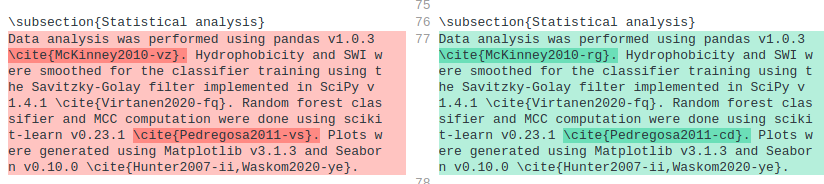